In [6]:
#import dataset
import pandas as pd
tweet_df=pd.read_csv('/path/to/tweets_training.csv', index_col=0)

In [7]:
tweet_df.dropna(inplace=True)

In [8]:
tweet_df

,label,tweet_text
0,1,doing it next week either by painkiller or jum...
1,0,i went with the yellow i m feeling bloated and...
2,1,i never knew holiday depression could get this...
3,1,deepika padukone give suggestion for those who...
4,1,low functioning depression mode
...,...,...
9960,0,just worked my last night at the oakland child...
9961,0,umm what s that supposed to me
9962,1,dear mom i m sorry i couldn t make you any pro...
9963,0,can not find any catch phrase for my design


In [9]:
tweet_df=tweet_df.reset_index(drop=True)

In [10]:
#import Count Vectorizer and create stop words from words occur most frequent
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
cv=CountVectorizer()
cv.fit(tweet_df['tweet_text'])
freq_terms_mh=cv.transform(tweet_df[tweet_df['label']==1].tweet_text)
freq_terms_nmh=cv.transform(tweet_df[tweet_df['label']==0].tweet_text)
mh_arr=np.sum(freq_terms_mh, axis=0)
nmh_arr=np.sum(freq_terms_nmh, axis=0)

mh=np.squeeze(np.asarray(mh_arr))
nmh=np.squeeze(np.asarray(nmh_arr))

terms_freq_df=pd.DataFrame([mh,nmh], columns=cv.get_feature_names_out()).transpose()

terms_freq_df['total']=terms_freq_df[1]+terms_freq_df[0]

In [11]:
stop_words=terms_freq_df.sort_values(by='total', ascending=False).iloc[:10].index.tolist()

In [12]:
stop_words

['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me']

In [13]:
#define models and params for GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.model_selection import train_test_split

In [9]:
#Use Grid Search CV to choose model

lr_model=LogisticRegression(max_iter=5000)
nb_model=BernoulliNB()
svm_model=svm.SVC()

model_params=[('lr',lr_model, {'vect__ngram_range': [(1,1),(1,2),(1,3)],
             'vect__stop_words':[stop_words, 'english', None],
            'lr__C':[10,1,0.1]}),('nb',nb_model,{'vect__ngram_range': [(1,1),(1,2),(1,3)],
                            'vect__stop_words':[stop_words,'english',None],
                        'nb__alpha':[100,1.0,0.1]})]

svm_params=('svm',svm_model, {'vect__ngram_range': [(1,1),(1,2),(1,3)], 'vect__stop_words':[stop_words,'english',None],'svm__C': [100,1,0.1],'svm__kernel': ['linear','rbf', 'poly','sigmoid']})
model_params.append(svm_params)
best_models=[]

X=tweet_df['tweet_text'].tolist()
y=tweet_df['label'].tolist()
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=42)
vect=CountVectorizer()
for model_desc in model_params:
    
    pipeline=Pipeline([('vect',vect),
                     (str(model_desc[0]), model_desc[1] )])
    print(model_desc[1])
    gscv=GridSearchCV(pipeline, param_grid=model_desc[2], cv=10, scoring='accuracy', verbose=10)
    gscv.fit(X_train, y_train)
    best_models.append((model_desc[0], gscv.best_params_, gscv.best_score_))
    
    


    

LogisticRegression(max_iter=5000)
Fitting 10 folds for each of 27 candidates, totalling 270 fits
[CV 1/10; 1/27] START lr__C=10, vect__ngram_range=(1, 1), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me']
[CV 1/10; 1/27] END lr__C=10, vect__ngram_range=(1, 1), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me'];, score=0.908 total time=   0.7s
[CV 2/10; 1/27] START lr__C=10, vect__ngram_range=(1, 1), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me']
[CV 2/10; 1/27] END lr__C=10, vect__ngram_range=(1, 1), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me'];, score=0.895 total time=   1.0s
[CV 3/10; 1/27] START lr__C=10, vect__ngram_range=(1, 1), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me']
[CV 3/10; 1/27] END lr__C=10, vect__ngram_range=(1, 1), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me'];, score=0

[CV 5/10; 4/27] END lr__C=10, vect__ngram_range=(1, 2), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me'];, score=0.911 total time=   3.0s
[CV 6/10; 4/27] START lr__C=10, vect__ngram_range=(1, 2), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me']
[CV 6/10; 4/27] END lr__C=10, vect__ngram_range=(1, 2), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me'];, score=0.899 total time=   3.5s
[CV 7/10; 4/27] START lr__C=10, vect__ngram_range=(1, 2), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me']
[CV 7/10; 4/27] END lr__C=10, vect__ngram_range=(1, 2), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me'];, score=0.895 total time=   3.2s
[CV 8/10; 4/27] START lr__C=10, vect__ngram_range=(1, 2), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me']
[CV 8/10; 4/27] END lr__C=10, vect__ngram_range=(1, 2), vect__stop_words=

[CV 9/10; 7/27] END lr__C=10, vect__ngram_range=(1, 3), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me'];, score=0.879 total time=   7.5s
[CV 10/10; 7/27] START lr__C=10, vect__ngram_range=(1, 3), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me']
[CV 10/10; 7/27] END lr__C=10, vect__ngram_range=(1, 3), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me'];, score=0.908 total time=   6.4s
[CV 1/10; 8/27] START lr__C=10, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 1/10; 8/27] END lr__C=10, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.897 total time=   4.2s
[CV 2/10; 8/27] START lr__C=10, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 2/10; 8/27] END lr__C=10, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.901 total time=   4.0s
[CV 3/10; 8/27] START lr__C=10, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 3/10; 8/27] END lr__C=10, vect__ngram_

[CV 5/10; 11/27] END lr__C=1, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.907 total time=   0.5s
[CV 6/10; 11/27] START lr__C=1, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 6/10; 11/27] END lr__C=1, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.899 total time=   0.6s
[CV 7/10; 11/27] START lr__C=1, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 7/10; 11/27] END lr__C=1, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.886 total time=   0.6s
[CV 8/10; 11/27] START lr__C=1, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 8/10; 11/27] END lr__C=1, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.891 total time=   0.6s
[CV 9/10; 11/27] START lr__C=1, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 9/10; 11/27] END lr__C=1, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.881 total time=   0.7s
[CV 10/10; 11/27] START lr__C=1, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 10/10; 11/

[CV 2/10; 15/27] END lr__C=1, vect__ngram_range=(1, 2), vect__stop_words=None;, score=0.904 total time=   2.9s
[CV 3/10; 15/27] START lr__C=1, vect__ngram_range=(1, 2), vect__stop_words=None.
[CV 3/10; 15/27] END lr__C=1, vect__ngram_range=(1, 2), vect__stop_words=None;, score=0.920 total time=   2.7s
[CV 4/10; 15/27] START lr__C=1, vect__ngram_range=(1, 2), vect__stop_words=None.
[CV 4/10; 15/27] END lr__C=1, vect__ngram_range=(1, 2), vect__stop_words=None;, score=0.909 total time=   3.1s
[CV 5/10; 15/27] START lr__C=1, vect__ngram_range=(1, 2), vect__stop_words=None.
[CV 5/10; 15/27] END lr__C=1, vect__ngram_range=(1, 2), vect__stop_words=None;, score=0.899 total time=   2.8s
[CV 6/10; 15/27] START lr__C=1, vect__ngram_range=(1, 2), vect__stop_words=None.
[CV 6/10; 15/27] END lr__C=1, vect__ngram_range=(1, 2), vect__stop_words=None;, score=0.908 total time=   2.7s
[CV 7/10; 15/27] START lr__C=1, vect__ngram_range=(1, 2), vect__stop_words=None.
[CV 7/10; 15/27] END lr__C=1, vect__ngra

[CV 9/10; 18/27] END lr__C=1, vect__ngram_range=(1, 3), vect__stop_words=None;, score=0.888 total time=   5.7s
[CV 10/10; 18/27] START lr__C=1, vect__ngram_range=(1, 3), vect__stop_words=None
[CV 10/10; 18/27] END lr__C=1, vect__ngram_range=(1, 3), vect__stop_words=None;, score=0.899 total time=   6.2s
[CV 1/10; 19/27] START lr__C=0.1, vect__ngram_range=(1, 1), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me']
[CV 1/10; 19/27] END lr__C=0.1, vect__ngram_range=(1, 1), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me'];, score=0.911 total time=   0.4s
[CV 2/10; 19/27] START lr__C=0.1, vect__ngram_range=(1, 1), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me']
[CV 2/10; 19/27] END lr__C=0.1, vect__ngram_range=(1, 1), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me'];, score=0.899 total time=   0.5s
[CV 3/10; 19/27] START lr__C=0.1, vect__ngram_range=(1, 1), vect__stop

[CV 4/10; 22/27] END lr__C=0.1, vect__ngram_range=(1, 2), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me'];, score=0.894 total time=   1.6s
[CV 5/10; 22/27] START lr__C=0.1, vect__ngram_range=(1, 2), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me']
[CV 5/10; 22/27] END lr__C=0.1, vect__ngram_range=(1, 2), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me'];, score=0.907 total time=   1.6s
[CV 6/10; 22/27] START lr__C=0.1, vect__ngram_range=(1, 2), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me']
[CV 6/10; 22/27] END lr__C=0.1, vect__ngram_range=(1, 2), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me'];, score=0.891 total time=   1.6s
[CV 7/10; 22/27] START lr__C=0.1, vect__ngram_range=(1, 2), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me']
[CV 7/10; 22/27] END lr__C=0.1, vect__ngram_range=(1, 2), vec

[CV 8/10; 25/27] END lr__C=0.1, vect__ngram_range=(1, 3), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me'];, score=0.898 total time=   2.7s
[CV 9/10; 25/27] START lr__C=0.1, vect__ngram_range=(1, 3), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me']
[CV 9/10; 25/27] END lr__C=0.1, vect__ngram_range=(1, 3), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me'];, score=0.882 total time=   2.6s
[CV 10/10; 25/27] START lr__C=0.1, vect__ngram_range=(1, 3), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me']
[CV 10/10; 25/27] END lr__C=0.1, vect__ngram_range=(1, 3), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me'];, score=0.897 total time=   2.7s
[CV 1/10; 26/27] START lr__C=0.1, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 1/10; 26/27] END lr__C=0.1, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.902 total time=   1.5s

[CV 3/10; 2/27] END nb__alpha=100, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.514 total time=   0.1s
[CV 4/10; 2/27] START nb__alpha=100, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 4/10; 2/27] END nb__alpha=100, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.514 total time=   0.1s
[CV 5/10; 2/27] START nb__alpha=100, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 5/10; 2/27] END nb__alpha=100, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.514 total time=   0.1s
[CV 6/10; 2/27] START nb__alpha=100, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 6/10; 2/27] END nb__alpha=100, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.514 total time=   0.1s
[CV 7/10; 2/27] START nb__alpha=100, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 7/10; 2/27] END nb__alpha=100, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.514 total time=   0.1s
[CV 8/10; 2/27] START nb__alpha=100, vect__ngram_rang

[CV 8/10; 5/27] END nb__alpha=100, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.514 total time=   0.3s
[CV 9/10; 5/27] START nb__alpha=100, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 9/10; 5/27] END nb__alpha=100, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.514 total time=   0.3s
[CV 10/10; 5/27] START nb__alpha=100, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 10/10; 5/27] END nb__alpha=100, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.514 total time=   0.3s
[CV 1/10; 6/27] START nb__alpha=100, vect__ngram_range=(1, 2), vect__stop_words=None
[CV 1/10; 6/27] END nb__alpha=100, vect__ngram_range=(1, 2), vect__stop_words=None;, score=0.516 total time=   0.4s
[CV 2/10; 6/27] START nb__alpha=100, vect__ngram_range=(1, 2), vect__stop_words=None
[CV 2/10; 6/27] END nb__alpha=100, vect__ngram_range=(1, 2), vect__stop_words=None;, score=0.516 total time=   0.4s
[CV 3/10; 6/27] START nb__alpha=100, vect__ngram_range=(1, 2), 

[CV 3/10; 9/27] END nb__alpha=100, vect__ngram_range=(1, 3), vect__stop_words=None;, score=0.514 total time=   0.8s
[CV 4/10; 9/27] START nb__alpha=100, vect__ngram_range=(1, 3), vect__stop_words=None
[CV 4/10; 9/27] END nb__alpha=100, vect__ngram_range=(1, 3), vect__stop_words=None;, score=0.514 total time=   0.8s
[CV 5/10; 9/27] START nb__alpha=100, vect__ngram_range=(1, 3), vect__stop_words=None
[CV 5/10; 9/27] END nb__alpha=100, vect__ngram_range=(1, 3), vect__stop_words=None;, score=0.514 total time=   0.8s
[CV 6/10; 9/27] START nb__alpha=100, vect__ngram_range=(1, 3), vect__stop_words=None
[CV 6/10; 9/27] END nb__alpha=100, vect__ngram_range=(1, 3), vect__stop_words=None;, score=0.514 total time=   0.8s
[CV 7/10; 9/27] START nb__alpha=100, vect__ngram_range=(1, 3), vect__stop_words=None
[CV 7/10; 9/27] END nb__alpha=100, vect__ngram_range=(1, 3), vect__stop_words=None;, score=0.514 total time=   0.8s
[CV 8/10; 9/27] START nb__alpha=100, vect__ngram_range=(1, 3), vect__stop_words=

[CV 9/10; 12/27] END nb__alpha=1.0, vect__ngram_range=(1, 1), vect__stop_words=None;, score=0.740 total time=   0.1s
[CV 10/10; 12/27] START nb__alpha=1.0, vect__ngram_range=(1, 1), vect__stop_words=None
[CV 10/10; 12/27] END nb__alpha=1.0, vect__ngram_range=(1, 1), vect__stop_words=None;, score=0.764 total time=   0.1s
[CV 1/10; 13/27] START nb__alpha=1.0, vect__ngram_range=(1, 2), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me']
[CV 1/10; 13/27] END nb__alpha=1.0, vect__ngram_range=(1, 2), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me'];, score=0.767 total time=   0.3s
[CV 2/10; 13/27] START nb__alpha=1.0, vect__ngram_range=(1, 2), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me']
[CV 2/10; 13/27] END nb__alpha=1.0, vect__ngram_range=(1, 2), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me'];, score=0.736 total time=   0.3s
[CV 3/10; 13/27] START nb__alpha=1.0

[CV 3/10; 16/27] END nb__alpha=1.0, vect__ngram_range=(1, 3), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me'];, score=0.695 total time=   0.7s
[CV 4/10; 16/27] START nb__alpha=1.0, vect__ngram_range=(1, 3), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me']
[CV 4/10; 16/27] END nb__alpha=1.0, vect__ngram_range=(1, 3), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me'];, score=0.670 total time=   0.7s
[CV 5/10; 16/27] START nb__alpha=1.0, vect__ngram_range=(1, 3), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me']
[CV 5/10; 16/27] END nb__alpha=1.0, vect__ngram_range=(1, 3), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me'];, score=0.671 total time=   0.7s
[CV 6/10; 16/27] START nb__alpha=1.0, vect__ngram_range=(1, 3), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me']
[CV 6/10; 16/27] END nb__alpha=1.0, v

[CV 6/10; 19/27] END nb__alpha=0.1, vect__ngram_range=(1, 1), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me'];, score=0.816 total time=   0.1s
[CV 7/10; 19/27] START nb__alpha=0.1, vect__ngram_range=(1, 1), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me']
[CV 7/10; 19/27] END nb__alpha=0.1, vect__ngram_range=(1, 1), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me'];, score=0.818 total time=   0.1s
[CV 8/10; 19/27] START nb__alpha=0.1, vect__ngram_range=(1, 1), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me']
[CV 8/10; 19/27] END nb__alpha=0.1, vect__ngram_range=(1, 1), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me'];, score=0.835 total time=   0.1s
[CV 9/10; 19/27] START nb__alpha=0.1, vect__ngram_range=(1, 1), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me']
[CV 9/10; 19/27] END nb__alpha=0.1, v

[CV 9/10; 22/27] END nb__alpha=0.1, vect__ngram_range=(1, 2), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me'];, score=0.756 total time=   0.3s
[CV 10/10; 22/27] START nb__alpha=0.1, vect__ngram_range=(1, 2), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me']
[CV 10/10; 22/27] END nb__alpha=0.1, vect__ngram_range=(1, 2), vect__stop_words=['to', 'and', 'the', 'my', 'not', 'it', 'is', 'of', 'do', 'me'];, score=0.761 total time=   0.3s
[CV 1/10; 23/27] START nb__alpha=0.1, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 1/10; 23/27] END nb__alpha=0.1, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.846 total time=   0.2s
[CV 2/10; 23/27] START nb__alpha=0.1, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 2/10; 23/27] END nb__alpha=0.1, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.806 total time=   0.2s
[CV 3/10; 23/27] START nb__alpha=0.1, vect__ngram_range=(1, 2), vect__stop_words=en

[CV 3/10; 26/27] END nb__alpha=0.1, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.779 total time=   0.4s
[CV 4/10; 26/27] START nb__alpha=0.1, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 4/10; 26/27] END nb__alpha=0.1, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.747 total time=   0.4s
[CV 5/10; 26/27] START nb__alpha=0.1, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 5/10; 26/27] END nb__alpha=0.1, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.763 total time=   0.4s
[CV 6/10; 26/27] START nb__alpha=0.1, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 6/10; 26/27] END nb__alpha=0.1, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.749 total time=   0.4s
[CV 7/10; 26/27] START nb__alpha=0.1, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 7/10; 26/27] END nb__alpha=0.1, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.754 total time=   0.4s
[CV 8/10; 26/27] START nb__alpha=0.1, vect__

[CV 5/10; 2/108] END svm__C=100, svm__kernel=linear, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.833 total time=   2.4s
[CV 6/10; 2/108] START svm__C=100, svm__kernel=linear, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 6/10; 2/108] END svm__C=100, svm__kernel=linear, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.845 total time=   2.4s
[CV 7/10; 2/108] START svm__C=100, svm__kernel=linear, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 7/10; 2/108] END svm__C=100, svm__kernel=linear, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.835 total time=   2.7s
[CV 8/10; 2/108] START svm__C=100, svm__kernel=linear, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 8/10; 2/108] END svm__C=100, svm__kernel=linear, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.843 total time=   2.1s
[CV 9/10; 2/108] START svm__C=100, svm__kernel=linear, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 9/10; 2/108] END svm__C=

[CV 5/10; 5/108] END svm__C=100, svm__kernel=linear, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.864 total time=   2.0s
[CV 6/10; 5/108] START svm__C=100, svm__kernel=linear, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 6/10; 5/108] END svm__C=100, svm__kernel=linear, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.865 total time=   2.1s
[CV 7/10; 5/108] START svm__C=100, svm__kernel=linear, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 7/10; 5/108] END svm__C=100, svm__kernel=linear, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.845 total time=   2.0s
[CV 8/10; 5/108] START svm__C=100, svm__kernel=linear, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 8/10; 5/108] END svm__C=100, svm__kernel=linear, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.849 total time=   2.0s
[CV 9/10; 5/108] START svm__C=100, svm__kernel=linear, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 9/10; 5/108] END svm__C=

[CV 5/10; 8/108] END svm__C=100, svm__kernel=linear, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.859 total time=   2.5s
[CV 6/10; 8/108] START svm__C=100, svm__kernel=linear, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 6/10; 8/108] END svm__C=100, svm__kernel=linear, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.843 total time=   2.6s
[CV 7/10; 8/108] START svm__C=100, svm__kernel=linear, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 7/10; 8/108] END svm__C=100, svm__kernel=linear, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.835 total time=   2.5s
[CV 8/10; 8/108] START svm__C=100, svm__kernel=linear, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 8/10; 8/108] END svm__C=100, svm__kernel=linear, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.842 total time=   2.5s
[CV 9/10; 8/108] START svm__C=100, svm__kernel=linear, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 9/10; 8/108] END svm__C=

[CV 5/10; 11/108] END svm__C=100, svm__kernel=rbf, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.898 total time=   3.0s
[CV 6/10; 11/108] START svm__C=100, svm__kernel=rbf, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 6/10; 11/108] END svm__C=100, svm__kernel=rbf, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.861 total time=   3.1s
[CV 7/10; 11/108] START svm__C=100, svm__kernel=rbf, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 7/10; 11/108] END svm__C=100, svm__kernel=rbf, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.875 total time=   3.0s
[CV 8/10; 11/108] START svm__C=100, svm__kernel=rbf, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 8/10; 11/108] END svm__C=100, svm__kernel=rbf, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.859 total time=   2.3s
[CV 9/10; 11/108] START svm__C=100, svm__kernel=rbf, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 9/10; 11/108] END svm__C=100, svm__kerne

[CV 5/10; 14/108] END svm__C=100, svm__kernel=rbf, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.894 total time=   5.1s
[CV 6/10; 14/108] START svm__C=100, svm__kernel=rbf, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 6/10; 14/108] END svm__C=100, svm__kernel=rbf, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.878 total time=   5.1s
[CV 7/10; 14/108] START svm__C=100, svm__kernel=rbf, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 7/10; 14/108] END svm__C=100, svm__kernel=rbf, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.866 total time=   5.0s
[CV 8/10; 14/108] START svm__C=100, svm__kernel=rbf, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 8/10; 14/108] END svm__C=100, svm__kernel=rbf, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.862 total time=   5.0s
[CV 9/10; 14/108] START svm__C=100, svm__kernel=rbf, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 9/10; 14/108] END svm__C=100, svm__kerne

[CV 5/10; 17/108] END svm__C=100, svm__kernel=rbf, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.876 total time=   5.4s
[CV 6/10; 17/108] START svm__C=100, svm__kernel=rbf, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 6/10; 17/108] END svm__C=100, svm__kernel=rbf, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.866 total time=   5.4s
[CV 7/10; 17/108] START svm__C=100, svm__kernel=rbf, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 7/10; 17/108] END svm__C=100, svm__kernel=rbf, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.864 total time=   5.3s
[CV 8/10; 17/108] START svm__C=100, svm__kernel=rbf, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 8/10; 17/108] END svm__C=100, svm__kernel=rbf, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.849 total time=   5.3s
[CV 9/10; 17/108] START svm__C=100, svm__kernel=rbf, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 9/10; 17/108] END svm__C=100, svm__kerne

[CV 5/10; 20/108] END svm__C=100, svm__kernel=poly, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.874 total time=   2.9s
[CV 6/10; 20/108] START svm__C=100, svm__kernel=poly, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 6/10; 20/108] END svm__C=100, svm__kernel=poly, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.855 total time=   5.1s
[CV 7/10; 20/108] START svm__C=100, svm__kernel=poly, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 7/10; 20/108] END svm__C=100, svm__kernel=poly, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.832 total time=   2.9s
[CV 8/10; 20/108] START svm__C=100, svm__kernel=poly, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 8/10; 20/108] END svm__C=100, svm__kernel=poly, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.855 total time=   5.4s
[CV 9/10; 20/108] START svm__C=100, svm__kernel=poly, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 9/10; 20/108] END svm__C=100, sv

[CV 5/10; 23/108] END svm__C=100, svm__kernel=poly, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.851 total time=   4.5s
[CV 6/10; 23/108] START svm__C=100, svm__kernel=poly, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 6/10; 23/108] END svm__C=100, svm__kernel=poly, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.820 total time=   4.4s
[CV 7/10; 23/108] START svm__C=100, svm__kernel=poly, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 7/10; 23/108] END svm__C=100, svm__kernel=poly, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.802 total time=   4.5s
[CV 8/10; 23/108] START svm__C=100, svm__kernel=poly, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 8/10; 23/108] END svm__C=100, svm__kernel=poly, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.835 total time=   4.4s
[CV 9/10; 23/108] START svm__C=100, svm__kernel=poly, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 9/10; 23/108] END svm__C=100, sv

[CV 5/10; 26/108] END svm__C=100, svm__kernel=poly, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.718 total time=   5.5s
[CV 6/10; 26/108] START svm__C=100, svm__kernel=poly, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 6/10; 26/108] END svm__C=100, svm__kernel=poly, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.668 total time=   5.5s
[CV 7/10; 26/108] START svm__C=100, svm__kernel=poly, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 7/10; 26/108] END svm__C=100, svm__kernel=poly, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.697 total time=   5.5s
[CV 8/10; 26/108] START svm__C=100, svm__kernel=poly, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 8/10; 26/108] END svm__C=100, svm__kernel=poly, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.685 total time=   5.4s
[CV 9/10; 26/108] START svm__C=100, svm__kernel=poly, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 9/10; 26/108] END svm__C=100, sv

[CV 5/10; 29/108] END svm__C=100, svm__kernel=sigmoid, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.807 total time=   0.8s
[CV 6/10; 29/108] START svm__C=100, svm__kernel=sigmoid, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 6/10; 29/108] END svm__C=100, svm__kernel=sigmoid, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.787 total time=   0.8s
[CV 7/10; 29/108] START svm__C=100, svm__kernel=sigmoid, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 7/10; 29/108] END svm__C=100, svm__kernel=sigmoid, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.776 total time=   0.8s
[CV 8/10; 29/108] START svm__C=100, svm__kernel=sigmoid, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 8/10; 29/108] END svm__C=100, svm__kernel=sigmoid, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.835 total time=   0.8s
[CV 9/10; 29/108] START svm__C=100, svm__kernel=sigmoid, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 9/10; 29

[CV 4/10; 32/108] END svm__C=100, svm__kernel=sigmoid, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.786 total time=   1.1s
[CV 5/10; 32/108] START svm__C=100, svm__kernel=sigmoid, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 5/10; 32/108] END svm__C=100, svm__kernel=sigmoid, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.825 total time=   1.1s
[CV 6/10; 32/108] START svm__C=100, svm__kernel=sigmoid, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 6/10; 32/108] END svm__C=100, svm__kernel=sigmoid, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.822 total time=   1.2s
[CV 7/10; 32/108] START svm__C=100, svm__kernel=sigmoid, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 7/10; 32/108] END svm__C=100, svm__kernel=sigmoid, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.807 total time=   1.2s
[CV 8/10; 32/108] START svm__C=100, svm__kernel=sigmoid, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 8/10; 32

[CV 3/10; 35/108] END svm__C=100, svm__kernel=sigmoid, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.813 total time=   1.6s
[CV 4/10; 35/108] START svm__C=100, svm__kernel=sigmoid, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 4/10; 35/108] END svm__C=100, svm__kernel=sigmoid, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.784 total time=   1.4s
[CV 5/10; 35/108] START svm__C=100, svm__kernel=sigmoid, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 5/10; 35/108] END svm__C=100, svm__kernel=sigmoid, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.822 total time=   1.4s
[CV 6/10; 35/108] START svm__C=100, svm__kernel=sigmoid, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 6/10; 35/108] END svm__C=100, svm__kernel=sigmoid, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.819 total time=   1.4s
[CV 7/10; 35/108] START svm__C=100, svm__kernel=sigmoid, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 7/10; 35

[CV 3/10; 38/108] END svm__C=1, svm__kernel=linear, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.901 total time=   1.5s
[CV 4/10; 38/108] START svm__C=1, svm__kernel=linear, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 4/10; 38/108] END svm__C=1, svm__kernel=linear, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.885 total time=   1.6s
[CV 5/10; 38/108] START svm__C=1, svm__kernel=linear, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 5/10; 38/108] END svm__C=1, svm__kernel=linear, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.894 total time=   1.7s
[CV 6/10; 38/108] START svm__C=1, svm__kernel=linear, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 6/10; 38/108] END svm__C=1, svm__kernel=linear, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.886 total time=   1.7s
[CV 7/10; 38/108] START svm__C=1, svm__kernel=linear, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 7/10; 38/108] END svm__C=1, svm_

[CV 3/10; 41/108] END svm__C=1, svm__kernel=linear, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.907 total time=   2.1s
[CV 4/10; 41/108] START svm__C=1, svm__kernel=linear, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 4/10; 41/108] END svm__C=1, svm__kernel=linear, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.876 total time=   2.1s
[CV 5/10; 41/108] START svm__C=1, svm__kernel=linear, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 5/10; 41/108] END svm__C=1, svm__kernel=linear, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.904 total time=   2.1s
[CV 6/10; 41/108] START svm__C=1, svm__kernel=linear, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 6/10; 41/108] END svm__C=1, svm__kernel=linear, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.894 total time=   2.2s
[CV 7/10; 41/108] START svm__C=1, svm__kernel=linear, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 7/10; 41/108] END svm__C=1, svm_

[CV 3/10; 44/108] END svm__C=1, svm__kernel=linear, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.908 total time=   2.8s
[CV 4/10; 44/108] START svm__C=1, svm__kernel=linear, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 4/10; 44/108] END svm__C=1, svm__kernel=linear, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.871 total time=   2.7s
[CV 5/10; 44/108] START svm__C=1, svm__kernel=linear, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 5/10; 44/108] END svm__C=1, svm__kernel=linear, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.898 total time=   2.7s
[CV 6/10; 44/108] START svm__C=1, svm__kernel=linear, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 6/10; 44/108] END svm__C=1, svm__kernel=linear, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.886 total time=   2.7s
[CV 7/10; 44/108] START svm__C=1, svm__kernel=linear, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 7/10; 44/108] END svm__C=1, svm_

[CV 3/10; 47/108] END svm__C=1, svm__kernel=rbf, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.905 total time=   2.4s
[CV 4/10; 47/108] START svm__C=1, svm__kernel=rbf, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 4/10; 47/108] END svm__C=1, svm__kernel=rbf, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.891 total time=   2.4s
[CV 5/10; 47/108] START svm__C=1, svm__kernel=rbf, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 5/10; 47/108] END svm__C=1, svm__kernel=rbf, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.915 total time=   2.4s
[CV 6/10; 47/108] START svm__C=1, svm__kernel=rbf, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 6/10; 47/108] END svm__C=1, svm__kernel=rbf, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.897 total time=   2.4s
[CV 7/10; 47/108] START svm__C=1, svm__kernel=rbf, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 7/10; 47/108] END svm__C=1, svm__kernel=rbf, vect__ngram

[CV 4/10; 50/108] END svm__C=1, svm__kernel=rbf, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.882 total time=   3.7s
[CV 5/10; 50/108] START svm__C=1, svm__kernel=rbf, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 5/10; 50/108] END svm__C=1, svm__kernel=rbf, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.901 total time=   3.7s
[CV 6/10; 50/108] START svm__C=1, svm__kernel=rbf, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 6/10; 50/108] END svm__C=1, svm__kernel=rbf, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.879 total time=   3.6s
[CV 7/10; 50/108] START svm__C=1, svm__kernel=rbf, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 7/10; 50/108] END svm__C=1, svm__kernel=rbf, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.864 total time=   3.7s
[CV 8/10; 50/108] START svm__C=1, svm__kernel=rbf, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 8/10; 50/108] END svm__C=1, svm__kernel=rbf, vect__ngram

[CV 5/10; 53/108] END svm__C=1, svm__kernel=rbf, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.895 total time=   4.7s
[CV 6/10; 53/108] START svm__C=1, svm__kernel=rbf, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 6/10; 53/108] END svm__C=1, svm__kernel=rbf, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.861 total time=   4.6s
[CV 7/10; 53/108] START svm__C=1, svm__kernel=rbf, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 7/10; 53/108] END svm__C=1, svm__kernel=rbf, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.843 total time=   4.7s
[CV 8/10; 53/108] START svm__C=1, svm__kernel=rbf, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 8/10; 53/108] END svm__C=1, svm__kernel=rbf, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.872 total time=   4.6s
[CV 9/10; 53/108] START svm__C=1, svm__kernel=rbf, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 9/10; 53/108] END svm__C=1, svm__kernel=rbf, vect__ngram

[CV 6/10; 56/108] END svm__C=1, svm__kernel=poly, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.657 total time=   3.3s
[CV 7/10; 56/108] START svm__C=1, svm__kernel=poly, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 7/10; 56/108] END svm__C=1, svm__kernel=poly, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.659 total time=   3.2s
[CV 8/10; 56/108] START svm__C=1, svm__kernel=poly, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 8/10; 56/108] END svm__C=1, svm__kernel=poly, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.675 total time=   3.2s
[CV 9/10; 56/108] START svm__C=1, svm__kernel=poly, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 9/10; 56/108] END svm__C=1, svm__kernel=poly, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.657 total time=   3.3s
[CV 10/10; 56/108] START svm__C=1, svm__kernel=poly, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 10/10; 56/108] END svm__C=1, svm__kernel=poly, 

[CV 7/10; 59/108] END svm__C=1, svm__kernel=poly, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.593 total time=   4.6s
[CV 8/10; 59/108] START svm__C=1, svm__kernel=poly, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 8/10; 59/108] END svm__C=1, svm__kernel=poly, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.589 total time=   4.6s
[CV 9/10; 59/108] START svm__C=1, svm__kernel=poly, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 9/10; 59/108] END svm__C=1, svm__kernel=poly, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.586 total time=   4.7s
[CV 10/10; 59/108] START svm__C=1, svm__kernel=poly, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 10/10; 59/108] END svm__C=1, svm__kernel=poly, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.593 total time=   4.6s
[CV 1/10; 60/108] START svm__C=1, svm__kernel=poly, vect__ngram_range=(1, 2), vect__stop_words=None
[CV 1/10; 60/108] END svm__C=1, svm__kernel=poly, vec

[CV 8/10; 62/108] END svm__C=1, svm__kernel=poly, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.547 total time=   5.6s
[CV 9/10; 62/108] START svm__C=1, svm__kernel=poly, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 9/10; 62/108] END svm__C=1, svm__kernel=poly, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.553 total time=   5.7s
[CV 10/10; 62/108] START svm__C=1, svm__kernel=poly, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 10/10; 62/108] END svm__C=1, svm__kernel=poly, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.550 total time=   5.7s
[CV 1/10; 63/108] START svm__C=1, svm__kernel=poly, vect__ngram_range=(1, 3), vect__stop_words=None
[CV 1/10; 63/108] END svm__C=1, svm__kernel=poly, vect__ngram_range=(1, 3), vect__stop_words=None;, score=0.672 total time=   8.9s
[CV 2/10; 63/108] START svm__C=1, svm__kernel=poly, vect__ngram_range=(1, 3), vect__stop_words=None
[CV 2/10; 63/108] END svm__C=1, svm__kernel=poly, vect__ngr

[CV 8/10; 65/108] END svm__C=1, svm__kernel=sigmoid, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.855 total time=   1.2s
[CV 9/10; 65/108] START svm__C=1, svm__kernel=sigmoid, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 9/10; 65/108] END svm__C=1, svm__kernel=sigmoid, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.790 total time=   1.1s
[CV 10/10; 65/108] START svm__C=1, svm__kernel=sigmoid, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 10/10; 65/108] END svm__C=1, svm__kernel=sigmoid, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.815 total time=   1.1s
[CV 1/10; 66/108] START svm__C=1, svm__kernel=sigmoid, vect__ngram_range=(1, 1), vect__stop_words=None
[CV 1/10; 66/108] END svm__C=1, svm__kernel=sigmoid, vect__ngram_range=(1, 1), vect__stop_words=None;, score=0.606 total time=   3.2s
[CV 2/10; 66/108] START svm__C=1, svm__kernel=sigmoid, vect__ngram_range=(1, 1), vect__stop_words=None
[CV 2/10; 66/108] END svm__C=1, svm

[CV 8/10; 68/108] END svm__C=1, svm__kernel=sigmoid, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.875 total time=   1.9s
[CV 9/10; 68/108] START svm__C=1, svm__kernel=sigmoid, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 9/10; 68/108] END svm__C=1, svm__kernel=sigmoid, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.852 total time=   2.0s
[CV 10/10; 68/108] START svm__C=1, svm__kernel=sigmoid, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 10/10; 68/108] END svm__C=1, svm__kernel=sigmoid, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.868 total time=   1.9s
[CV 1/10; 69/108] START svm__C=1, svm__kernel=sigmoid, vect__ngram_range=(1, 2), vect__stop_words=None
[CV 1/10; 69/108] END svm__C=1, svm__kernel=sigmoid, vect__ngram_range=(1, 2), vect__stop_words=None;, score=0.665 total time=   4.6s
[CV 2/10; 69/108] START svm__C=1, svm__kernel=sigmoid, vect__ngram_range=(1, 2), vect__stop_words=None
[CV 2/10; 69/108] END svm__C=1, svm

[CV 8/10; 71/108] END svm__C=1, svm__kernel=sigmoid, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.882 total time=   3.0s
[CV 9/10; 71/108] START svm__C=1, svm__kernel=sigmoid, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 9/10; 71/108] END svm__C=1, svm__kernel=sigmoid, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.881 total time=   3.2s
[CV 10/10; 71/108] START svm__C=1, svm__kernel=sigmoid, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 10/10; 71/108] END svm__C=1, svm__kernel=sigmoid, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.878 total time=   3.0s
[CV 1/10; 72/108] START svm__C=1, svm__kernel=sigmoid, vect__ngram_range=(1, 3), vect__stop_words=None
[CV 1/10; 72/108] END svm__C=1, svm__kernel=sigmoid, vect__ngram_range=(1, 3), vect__stop_words=None;, score=0.710 total time=   5.7s
[CV 2/10; 72/108] START svm__C=1, svm__kernel=sigmoid, vect__ngram_range=(1, 3), vect__stop_words=None
[CV 2/10; 72/108] END svm__C=1, svm

[CV 8/10; 74/108] END svm__C=0.1, svm__kernel=linear, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.897 total time=   1.3s
[CV 9/10; 74/108] START svm__C=0.1, svm__kernel=linear, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 9/10; 74/108] END svm__C=0.1, svm__kernel=linear, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.882 total time=   1.3s
[CV 10/10; 74/108] START svm__C=0.1, svm__kernel=linear, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 10/10; 74/108] END svm__C=0.1, svm__kernel=linear, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.882 total time=   1.3s
[CV 1/10; 75/108] START svm__C=0.1, svm__kernel=linear, vect__ngram_range=(1, 1), vect__stop_words=None
[CV 1/10; 75/108] END svm__C=0.1, svm__kernel=linear, vect__ngram_range=(1, 1), vect__stop_words=None;, score=0.920 total time=   2.2s
[CV 2/10; 75/108] START svm__C=0.1, svm__kernel=linear, vect__ngram_range=(1, 1), vect__stop_words=None
[CV 2/10; 75/108] END svm__

[CV 8/10; 77/108] END svm__C=0.1, svm__kernel=linear, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.897 total time=   2.2s
[CV 9/10; 77/108] START svm__C=0.1, svm__kernel=linear, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 9/10; 77/108] END svm__C=0.1, svm__kernel=linear, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.875 total time=   2.2s
[CV 10/10; 77/108] START svm__C=0.1, svm__kernel=linear, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 10/10; 77/108] END svm__C=0.1, svm__kernel=linear, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.884 total time=   2.2s
[CV 1/10; 78/108] START svm__C=0.1, svm__kernel=linear, vect__ngram_range=(1, 2), vect__stop_words=None
[CV 1/10; 78/108] END svm__C=0.1, svm__kernel=linear, vect__ngram_range=(1, 2), vect__stop_words=None;, score=0.921 total time=   4.0s
[CV 2/10; 78/108] START svm__C=0.1, svm__kernel=linear, vect__ngram_range=(1, 2), vect__stop_words=None
[CV 2/10; 78/108] END svm__

[CV 8/10; 80/108] END svm__C=0.1, svm__kernel=linear, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.892 total time=   2.9s
[CV 9/10; 80/108] START svm__C=0.1, svm__kernel=linear, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 9/10; 80/108] END svm__C=0.1, svm__kernel=linear, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.874 total time=   2.9s
[CV 10/10; 80/108] START svm__C=0.1, svm__kernel=linear, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 10/10; 80/108] END svm__C=0.1, svm__kernel=linear, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.878 total time=   2.8s
[CV 1/10; 81/108] START svm__C=0.1, svm__kernel=linear, vect__ngram_range=(1, 3), vect__stop_words=None
[CV 1/10; 81/108] END svm__C=0.1, svm__kernel=linear, vect__ngram_range=(1, 3), vect__stop_words=None;, score=0.915 total time=   5.6s
[CV 2/10; 81/108] START svm__C=0.1, svm__kernel=linear, vect__ngram_range=(1, 3), vect__stop_words=None
[CV 2/10; 81/108] END svm__

[CV 8/10; 83/108] END svm__C=0.1, svm__kernel=rbf, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.872 total time=   2.4s
[CV 9/10; 83/108] START svm__C=0.1, svm__kernel=rbf, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 9/10; 83/108] END svm__C=0.1, svm__kernel=rbf, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.846 total time=   2.4s
[CV 10/10; 83/108] START svm__C=0.1, svm__kernel=rbf, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 10/10; 83/108] END svm__C=0.1, svm__kernel=rbf, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.859 total time=   2.3s
[CV 1/10; 84/108] START svm__C=0.1, svm__kernel=rbf, vect__ngram_range=(1, 1), vect__stop_words=None
[CV 1/10; 84/108] END svm__C=0.1, svm__kernel=rbf, vect__ngram_range=(1, 1), vect__stop_words=None;, score=0.876 total time=   3.9s
[CV 2/10; 84/108] START svm__C=0.1, svm__kernel=rbf, vect__ngram_range=(1, 1), vect__stop_words=None
[CV 2/10; 84/108] END svm__C=0.1, svm__kernel=rbf, 

[CV 8/10; 86/108] END svm__C=0.1, svm__kernel=rbf, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.869 total time=   3.6s
[CV 9/10; 86/108] START svm__C=0.1, svm__kernel=rbf, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 9/10; 86/108] END svm__C=0.1, svm__kernel=rbf, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.853 total time=   3.6s
[CV 10/10; 86/108] START svm__C=0.1, svm__kernel=rbf, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 10/10; 86/108] END svm__C=0.1, svm__kernel=rbf, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.861 total time=   3.6s
[CV 1/10; 87/108] START svm__C=0.1, svm__kernel=rbf, vect__ngram_range=(1, 2), vect__stop_words=None
[CV 1/10; 87/108] END svm__C=0.1, svm__kernel=rbf, vect__ngram_range=(1, 2), vect__stop_words=None;, score=0.874 total time=   6.4s
[CV 2/10; 87/108] START svm__C=0.1, svm__kernel=rbf, vect__ngram_range=(1, 2), vect__stop_words=None
[CV 2/10; 87/108] END svm__C=0.1, svm__kernel=rbf, 

[CV 8/10; 89/108] END svm__C=0.1, svm__kernel=rbf, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.848 total time=   4.5s
[CV 9/10; 89/108] START svm__C=0.1, svm__kernel=rbf, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 9/10; 89/108] END svm__C=0.1, svm__kernel=rbf, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.852 total time=   4.5s
[CV 10/10; 89/108] START svm__C=0.1, svm__kernel=rbf, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 10/10; 89/108] END svm__C=0.1, svm__kernel=rbf, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.846 total time=   4.7s
[CV 1/10; 90/108] START svm__C=0.1, svm__kernel=rbf, vect__ngram_range=(1, 3), vect__stop_words=None
[CV 1/10; 90/108] END svm__C=0.1, svm__kernel=rbf, vect__ngram_range=(1, 3), vect__stop_words=None;, score=0.872 total time=  11.0s
[CV 2/10; 90/108] START svm__C=0.1, svm__kernel=rbf, vect__ngram_range=(1, 3), vect__stop_words=None
[CV 2/10; 90/108] END svm__C=0.1, svm__kernel=rbf, 

[CV 8/10; 92/108] END svm__C=0.1, svm__kernel=poly, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.588 total time=   3.8s
[CV 9/10; 92/108] START svm__C=0.1, svm__kernel=poly, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 9/10; 92/108] END svm__C=0.1, svm__kernel=poly, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.591 total time=   3.5s
[CV 10/10; 92/108] START svm__C=0.1, svm__kernel=poly, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 10/10; 92/108] END svm__C=0.1, svm__kernel=poly, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.595 total time=   3.7s
[CV 1/10; 93/108] START svm__C=0.1, svm__kernel=poly, vect__ngram_range=(1, 1), vect__stop_words=None
[CV 1/10; 93/108] END svm__C=0.1, svm__kernel=poly, vect__ngram_range=(1, 1), vect__stop_words=None;, score=0.675 total time=   5.4s
[CV 2/10; 93/108] START svm__C=0.1, svm__kernel=poly, vect__ngram_range=(1, 1), vect__stop_words=None
[CV 2/10; 93/108] END svm__C=0.1, svm__kern

[CV 8/10; 95/108] END svm__C=0.1, svm__kernel=poly, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.539 total time=   5.2s
[CV 9/10; 95/108] START svm__C=0.1, svm__kernel=poly, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 9/10; 95/108] END svm__C=0.1, svm__kernel=poly, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.549 total time=   5.8s
[CV 10/10; 95/108] START svm__C=0.1, svm__kernel=poly, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 10/10; 95/108] END svm__C=0.1, svm__kernel=poly, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.546 total time=   5.6s
[CV 1/10; 96/108] START svm__C=0.1, svm__kernel=poly, vect__ngram_range=(1, 2), vect__stop_words=None
[CV 1/10; 96/108] END svm__C=0.1, svm__kernel=poly, vect__ngram_range=(1, 2), vect__stop_words=None;, score=0.652 total time=   8.6s
[CV 2/10; 96/108] START svm__C=0.1, svm__kernel=poly, vect__ngram_range=(1, 2), vect__stop_words=None
[CV 2/10; 96/108] END svm__C=0.1, svm__kern

[CV 8/10; 98/108] END svm__C=0.1, svm__kernel=poly, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.523 total time=   6.6s
[CV 9/10; 98/108] START svm__C=0.1, svm__kernel=poly, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 9/10; 98/108] END svm__C=0.1, svm__kernel=poly, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.529 total time=   6.5s
[CV 10/10; 98/108] START svm__C=0.1, svm__kernel=poly, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 10/10; 98/108] END svm__C=0.1, svm__kernel=poly, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.523 total time=   6.8s
[CV 1/10; 99/108] START svm__C=0.1, svm__kernel=poly, vect__ngram_range=(1, 3), vect__stop_words=None
[CV 1/10; 99/108] END svm__C=0.1, svm__kernel=poly, vect__ngram_range=(1, 3), vect__stop_words=None;, score=0.635 total time=  11.9s
[CV 2/10; 99/108] START svm__C=0.1, svm__kernel=poly, vect__ngram_range=(1, 3), vect__stop_words=None
[CV 2/10; 99/108] END svm__C=0.1, svm__kern

[CV 8/10; 101/108] END svm__C=0.1, svm__kernel=sigmoid, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.871 total time=   2.0s
[CV 9/10; 101/108] START svm__C=0.1, svm__kernel=sigmoid, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 9/10; 101/108] END svm__C=0.1, svm__kernel=sigmoid, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.865 total time=   2.0s
[CV 10/10; 101/108] START svm__C=0.1, svm__kernel=sigmoid, vect__ngram_range=(1, 1), vect__stop_words=english
[CV 10/10; 101/108] END svm__C=0.1, svm__kernel=sigmoid, vect__ngram_range=(1, 1), vect__stop_words=english;, score=0.865 total time=   2.2s
[CV 1/10; 102/108] START svm__C=0.1, svm__kernel=sigmoid, vect__ngram_range=(1, 1), vect__stop_words=None
[CV 1/10; 102/108] END svm__C=0.1, svm__kernel=sigmoid, vect__ngram_range=(1, 1), vect__stop_words=None;, score=0.625 total time=   3.8s
[CV 2/10; 102/108] START svm__C=0.1, svm__kernel=sigmoid, vect__ngram_range=(1, 1), vect__stop_words=None
[CV 2/10; 1

[CV 7/10; 104/108] END svm__C=0.1, svm__kernel=sigmoid, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.843 total time=   3.8s
[CV 8/10; 104/108] START svm__C=0.1, svm__kernel=sigmoid, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 8/10; 104/108] END svm__C=0.1, svm__kernel=sigmoid, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.865 total time=   3.4s
[CV 9/10; 104/108] START svm__C=0.1, svm__kernel=sigmoid, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 9/10; 104/108] END svm__C=0.1, svm__kernel=sigmoid, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.865 total time=   3.2s
[CV 10/10; 104/108] START svm__C=0.1, svm__kernel=sigmoid, vect__ngram_range=(1, 2), vect__stop_words=english
[CV 10/10; 104/108] END svm__C=0.1, svm__kernel=sigmoid, vect__ngram_range=(1, 2), vect__stop_words=english;, score=0.856 total time=   3.2s
[CV 1/10; 105/108] START svm__C=0.1, svm__kernel=sigmoid, vect__ngram_range=(1, 2), vect__stop_words=None
[CV 1

[CV 6/10; 107/108] END svm__C=0.1, svm__kernel=sigmoid, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.846 total time=   4.7s
[CV 7/10; 107/108] START svm__C=0.1, svm__kernel=sigmoid, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 7/10; 107/108] END svm__C=0.1, svm__kernel=sigmoid, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.833 total time=   4.5s
[CV 8/10; 107/108] START svm__C=0.1, svm__kernel=sigmoid, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 8/10; 107/108] END svm__C=0.1, svm__kernel=sigmoid, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.859 total time=   4.2s
[CV 9/10; 107/108] START svm__C=0.1, svm__kernel=sigmoid, vect__ngram_range=(1, 3), vect__stop_words=english
[CV 9/10; 107/108] END svm__C=0.1, svm__kernel=sigmoid, vect__ngram_range=(1, 3), vect__stop_words=english;, score=0.861 total time=   4.2s
[CV 10/10; 107/108] START svm__C=0.1, svm__kernel=sigmoid, vect__ngram_range=(1, 3), vect__stop_words=english
[CV

In [10]:
cv_results_df=pd.DataFrame(best_models, columns=['model', 'best_params','score'])

In [11]:
cv_results_df.set_index('model')

,best_params,score
model,,
lr,"{'lr__C': 1, 'vect__ngram_range': (1, 2), 'vec...",0.905029
nb,"{'nb__alpha': 0.1, 'vect__ngram_range': (1, 1)...",0.858333
svm,"{'svm__C': 0.1, 'svm__kernel': 'linear', 'vect...",0.906178


In [12]:
cv_results_df.to_pickle('/path/cv_results.pkl')

In [16]:
cv_results_df['best_params'].iloc[0]

{'lr__C': 1,
 'vect__ngram_range': (1, 2),
 'vect__stop_words': ['to',
  'and',
  'the',
  'my',
  'not',
  'it',
  'is',
  'of',
  'do',
  'me']}

In [18]:
logreg_vect=CountVectorizer(stop_words=stop_words, ngram_range=(1,2))
data=logreg_vect.fit_transform(X_train)
data_test=logreg_vect.transform(X_test)

In [19]:
logreg=LogisticRegression(C=1)

In [21]:
logreg.fit(data, y_train)

LogisticRegression(C=1)

In [24]:
preds=logreg.predict(data_test)

In [27]:
from sklearn.metrics import classification_report
report=classification_report(y_test, preds, output_dict=True)

In [28]:
report

{'0': {'precision': 0.8761961722488039,
  'recall': 0.9619172685489166,
  'f1-score': 0.917057902973396,
  'support': 1523},
 '1': {'precision': 0.9557926829268293,
  'recall': 0.8583162217659137,
  'f1-score': 0.9044356292823656,
  'support': 1461},
 'accuracy': 0.9111930294906166,
 'macro avg': {'precision': 0.9159944275878166,
  'recall': 0.9101167451574151,
  'f1-score': 0.9107467661278807,
  'support': 2984},
 'weighted avg': {'precision': 0.9151675201377433,
  'recall': 0.9111930294906166,
  'f1-score': 0.910877895646789,
  'support': 2984}}

In [29]:
df_report=pd.DataFrame(report).transpose()

In [30]:
df_report

,precision,recall,f1-score,support
0,0.876196,0.961917,0.917058,1523.000000
1,0.955793,0.858316,0.904436,1461.000000
accuracy,0.911193,0.911193,0.911193,0.911193
macro avg,0.915994,0.910117,0.910747,2984.000000
weighted avg,0.915168,0.911193,0.910878,2984.000000


In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [37]:
preds_roc = logreg.predict_proba(data_test)

In [38]:
fpr, tpr, threshold = roc_curve(y_test, preds_roc[:,1], pos_label=1)

In [40]:
random_preds_roc = [0 for i in range(len(y_test))]
p_fpr1, p_tpr1, _ = roc_curve(y_test, random_preds_roc, pos_label=1)

In [41]:
roc_auc_score(y_test, preds_roc[:,1])

0.9623558999291268

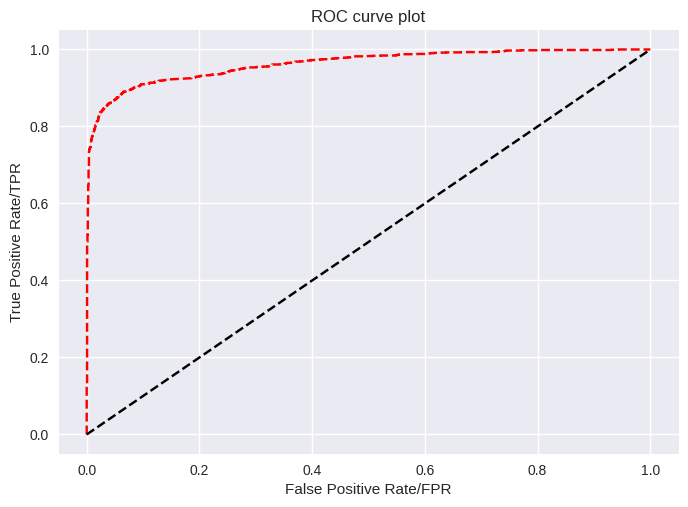

In [43]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot(fpr, tpr, linestyle='--',color='red', label='Logistic Regression')
plt.plot(p_fpr1, p_tpr1, linestyle='--', color='black')
plt.title('ROC curve plot')
plt.xlabel('False Positive Rate/FPR')
plt.ylabel('True Positive Rate/TPR')
plt.show();

In [44]:
from sklearn.pipeline import Pipeline
pipeline=Pipeline([
   
    ('cv', CountVectorizer(stop_words=stop_words, ngram_range=(1,2))),
    ('logreg', LogisticRegression(C=1))
])

In [45]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('cv',
                 CountVectorizer(ngram_range=(1, 2),
                                 stop_words=['to', 'and', 'the', 'my', 'not',
                                             'it', 'is', 'of', 'do', 'me'])),
                ('logreg', LogisticRegression(C=1))])

In [46]:
predicted=pipeline.predict(X_test)

In [47]:
accuracy_score(y_test, predicted)

0.9111930294906166

In [48]:
from joblib import dump, load
dump(pipeline, '/home/slawomir/Portfolio/omdena_self_harm_pred/tweets_to_model/tweets_pipeline_logreg.joblib')

['/home/slawomir/Portfolio/omdena_self_harm_pred/tweets_to_model/tweets_pipeline_logreg.joblib']